# Regen-Reheat Rankine Cycle Example

## Imports

In [1]:
from thermostate import State, Q_, units, SystemInternational as SI
from thermostate.plotting import IdealGas, VaporDome

---

## Definitions

In [2]:
substance = "water"
T_1 = Q_(480.0, "degC")
p_1 = Q_(12.0, "MPa")
p_2 = Q_(2.0, "MPa")
p_3 = p_2
T_3 = Q_(440.0, "degC")
p_4 = p_7 = p_8 = p_12 = Q_(0.3, "MPa")
p_5 = Q_(6.0, "kPa")
x_6 = Q_(0.0, "dimensionless")
x_8 = Q_(0.0, "dimensionless")
p_10 = Q_(12.0, "MPa")
T_10 = Q_(210.0, "degC")
x_11 = Q_(0.0, "dimensionless")
p_11 = p_2

---

## Problem Statement

Consider a regenerative vapor power cycle with two feedwater heaters, a closed one and an open one, and reheat. Steam enters the first turbine stage at 12.0 MPa, 480.0 celsius, and expands to 2.0 MPa. Some steam is extracted at 2.0 MPa and bled to the closed feedwater heater. The remainder is reheated at 2.0 MPa to 440.0 celsius and then expands through the second stage turbine, where an additional amount of steam is extracted and bled into the open feedwater heater operating at 0.3 MPa. The steam expanding through the third stage turbine exits at the condenser pressure of 6.0 kPa, and the steam exits the condenser as a saturated liquid at 6.0 kPa. Feedwater leaves the closed heater at 210.0 celsius, 12.0 MPa, and condensate exiting as saturated liquid at 2.0 MPa is trapped into the open feedwater heater. Saturated liquid at 0.3 MPa leaves the open feedwater heater. Assume all pumps and turbine stages operate isentropically. Determine for the cycle

1. the heat transfer to the working fluid passing through the steam generator and reheater, in kJ per kg of steam entering the first stage turbine
2. the thermal efficiency
3. the heat transfer from the working fluid passing through the condenser to the cooling water, in kJ per kg of steam entering the first stage turbine

---

## Solution

### 1. the heat transfer in the steam generator and reheater

The heat transfer can be found by drawing a control volume around the boiler/steam generator, including the reheat portion. Then, the first law reduces to

\begin{align*}
\dot{Q}_{in} &= \dot{m}_1\left(h_1 - h_{10}\right) + \dot{m}_3\left(h_3 - h_2\right) \\
\frac{\dot{Q}_{in}}{\dot{m}_1} &= \left(h_1 - h_{10}\right) + \left(1 - y'\right)\left(h_3 - h_2\right)
\end{align*}

where $y'$ is the fraction of the flow extracted to the closed feedwater heater. To find the value of $y'$, we draw a control volume around the closed feedwater heater and solve for $y'$

\begin{align*}
y' = \frac{h_{10} - h_9}{h_2 - h_{11}}
\end{align*}

First, fix the values for all the states using given information.

The regen reheat rankine cycle is made of 14 processes:

    1. Isentropic expansion
    2. Isobaric heat exchange
    3. Isentropic expansion
    4. Isentropic expansion
    5. Isobaric condensation
    6. Isentropic 
    7. Isobaric
    8. Isentropic
    9. Isobaric
    10. Isobaric
    11. Isoenthalpic
    12. Isobaric
    13. Isobaric
    14. Isobaric

The following properties are used to fix the four states:

State | Property 1 | Property 2 
:-----:|:-----:|:-----:
1|$$T_1 $$|$$p_1 $$
2|$$p_2 $$|$$s_2=s_1 $$
3|$$p_3=p_2 $$|$$T_3 $$
4|$$p_4 $$|$$s_4=s_3 $$
5|$$p_5 $$|$$s_5=s_4 $$
6|$$p_6=p_5 $$|$$x_6 $$
7|$$p_7=p_4 $$|$$s_7=s_6 $$
8|$$p_8=p_7 $$|$$x_8 $$
9|$$p_9=p_10 $$|$$s_9=s_8 $$
10|$$p_10 $$|$$T_10 $$
11|$$p_11=p_2 $$|$$x_11 $$
12|$$p_12=p_8 $$|$$h_12=h_11 $$

In [3]:
# State 1
st_1 = State(substance, T=T_1, p=p_1)
h_1 = st_1.h.to(SI.h)
s_1 = st_1.s.to(SI.s)

# State 2
s_2 = s_1
st_2 = State(substance, p=p_2, s=s_2)
h_2 = st_2.h.to(SI.h)
T_2 = st_2.T.to(SI.T)
x_2 = st_2.x

# State 3
st_3 = State(substance, p=p_3, T=T_3)
h_3 = st_3.h.to(SI.h)
s_3 = st_3.s.to(SI.s)

# State 4
s_4 = s_3
st_4 = State(substance, p=p_4, s=s_4)
h_4 = st_4.h.to(SI.h)
T_4 = st_4.T.to(SI.T)
x_4 = st_4.x

# State 5
s_5 = s_4
st_5 = State(substance, p=p_5, s=s_5)
h_5 = st_5.h.to(SI.h)
T_5 = st_5.T.to(SI.T)
x_5 = st_5.x

# State 6
p_6 = p_5
st_6 = State(substance, p=p_6, x=x_6)
h_6 = st_6.h.to(SI.h)
s_6 = st_6.s.to(SI.s)
T_6 = st_6.T.to(SI.T)

# State 7
s_7 = s_6
st_7 = State(substance, p=p_7, s=s_7)
h_7 = st_7.h.to(SI.h)
T_7 = st_7.T.to(SI.T)

# State 8
st_8 = State(substance, p=p_8, x=x_8)
h_8 = st_8.h.to(SI.h)
s_8 = st_8.s.to(SI.s)
T_8 = st_8.T.to(SI.T)

# State 9
s_9 = s_8
p_9 = p_10
st_9 = State(substance, p=p_9, s=s_9)
h_9 = st_9.h.to(SI.h)
T_9 = st_9.T.to(SI.T)

# State 10
st_10 = State(substance, p=p_10, T=T_10)
h_10 = st_10.h.to(SI.h)
s_10 = st_10.s.to(SI.s)

# State 11
st_11 = State(substance, p=p_11, x=x_11)
h_11 = st_11.h.to(SI.h)
s_11 = st_11.s.to(SI.s)
T_11 = st_11.T.to(SI.T)

# State 12
h_12 = h_11
st_12 = State(substance, p=p_12, h=h_12)
s_12 = st_12.s.to(SI.s)
T_12 = st_12.T.to(SI.T)
x_12 = st_12.x

Summarizing the states,

| State |                T                |                p                |                h                |                s                |               x                 |      phase      |
|-------|---------------------------------|---------------------------------|---------------------------------|---------------------------------|---------------------------------|-----------------|
|     1 | 480.00 celsius  | 12.00 MPa  | 3295.29 kJ/kg  | 6.4186 kJ/(K kg)  | ---                             | supercritical  |
|     2 | 225.46 celsius  | 2.00 MPa  | 2837.44 kJ/kg  | 6.4186 kJ/(K kg)  | ---                             | gas  |
|     3 | 440.00 celsius  | 2.00 MPa  | 3336.25 kJ/kg  | 7.2560 kJ/(K kg)  | ---                             | supercritical  |
|     4 | 187.07 celsius  | 0.30 MPa  | 2839.24 kJ/kg  | 7.2560 kJ/(K kg)  | ---                             | gas  |
|     5 | 36.16 celsius  | 6.00 kPa  | 2234.74 kJ/kg  | 7.2560 kJ/(K kg)  | 86.26%  | twophase  |
|     6 | 36.16 celsius  | 6.00 kPa  | 151.48 kJ/kg  | 0.5208 kJ/(K kg)  | 0.00%  | twophase  |
|     7 | 36.17 celsius  | 0.30 MPa  | 151.77 kJ/kg  | 0.5208 kJ/(K kg)  | ---                             | liquid  |
|     8 | 133.52 celsius  | 0.30 MPa  | 561.43 kJ/kg  | 1.6717 kJ/(K kg)  | 0.00%  | twophase  |
|     9 | 134.62 celsius  | 12.00 MPa  | 573.95 kJ/kg  | 1.6717 kJ/(K kg)  | ---                             | liquid  |
|    10 | 210.00 celsius | 12.00 MPa | 901.29 kJ/kg | 2.4077 kJ/(K kg) | ---                             | liquid |
|    11 | 212.38 celsius | 2.00 MPa | 908.50 kJ/kg | 2.4468 kJ/(K kg) | 0.00% | twophase |
|    12 | 133.52 celsius | 0.30 MPa | 908.50 kJ/kg | 2.5252 kJ/(K kg) | 16.04% | twophase |


Plotting the T-s diagram of the cycle,

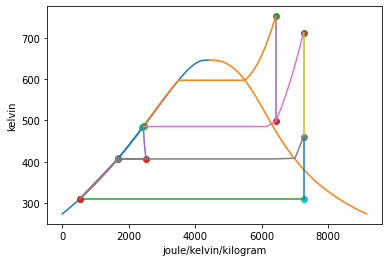

In [4]:
Regen = VaporDome(substance, ("s", "T"))

Regen.add_process(st_1, st_2, "isentropic")
Regen.add_process(st_2, st_3, "isobaric")
Regen.add_process(st_3, st_4, "isentropic")
Regen.add_process(st_4, st_5, "isentropic")
Regen.add_process(st_5, st_6, "isobaric")
Regen.add_process(st_6, st_7, "isentropic")
Regen.add_process(st_7, st_8, "isobaric")
Regen.add_process(st_8, st_9, "isentropic")
Regen.add_process(st_9, st_10, "isobaric")
Regen.add_process(st_10, st_1, "isobaric")

Regen.add_process(st_11, st_12, "isoenthalpic")
Regen.add_process(st_12, st_7, "isobaric")
Regen.add_process(st_2, st_11, "isobaric")
Regen.add_process(st_4, st_7, "isobaric")

In [5]:
y_p = (h_10 - h_9) / (h_2 - h_11)
Qdot_in = (h_1 - h_10 + (1 - y_p) * (h_3 - h_2)).to("kJ/kg")

<div class="alert alert-success">

**Answer:** The heat transfer input is $\dot{Q}_{in}/\dot{m} =$ 2808.15 kJ/kg

</div>

### 2. the thermal efficiency

To find the thermal efficiency, we need to calculate the net work output of the power plant. This involves all three turbine stages and both of the pump stages. First, we need to calculate the mass fractions of the flow, $y'$ and $y''$. To find these values, we need to draw control volumes around the feedwater heaters, moving from high pressure to low pressure. $y'$ has already been found, so we need to find $y''$

\begin{align*}
0 &= \dot{m}_7 h_7 + \dot{m}_{12} h_{12} + \dot{m}_{4} h_4 - \dot{m}_8 h_8
\end{align*}

Dividing through by $\dot{m}_1$ and noting that $\dot{m}_8 = \dot{m}_1$, $\dot{m}_{12} = \dot{m}_2$, and $\dot{m}_7 = \dot{m}_5$,

\begin{align*}
0 &= (1 - y' - y'')h_7 + y' h_{12} + y'' h_4 - h_8 \\
y'' &= \frac{h_8 - h_7 + y'(h_7 - h_{12})}{h_4 - h_7}
\end{align*}

In [6]:
y_pp = (h_8 - h_7 + y_p * (h_7 - h_12)) / (h_4 - h_7)

Now, for the turbine stages,

\begin{align*}
\dot{W}_t &= \dot{m}_1(h_1 - h_2) + \dot{m}_3 (h_3 - h_4) + \dot{m}_5 (h_4 - h_5) \\
\frac{\dot{W}_t}{\dot{m}_1} &= h_1 - h_2 + (1 - y')(h_3 - h_4) + (1 - y' - y'')(h_4 - h_5)
\end{align*}

In [7]:
Wdot_t = h_1 - h_2 + (1 - y_p) * (h_3 - h_4) + (1 - y_p - y_pp) * (h_4 - h_5)

and for the pump stages

\begin{align*}
\dot{W}_p &= \dot{m}_6(h_6 - h_7) + \dot{m}_8(h_8 - h_9) \\
\frac{\dot{W}_p}{\dot{m}_1} &= (1 - y' - y'')(h_6 - h_7) + h_8 - h_9
\end{align*}

In [8]:
Wdot_p = (1 - y_p - y_pp) * (h_6 - h_7) + h_8 - h_9
eta = ((Wdot_t + Wdot_p) / Qdot_in).to("dimensionless")

<div class="alert alert-success">

**Answer:** The thermal efficiency of the cycle is $\eta =$ 0.4617 = 46.17%

</div>

### 3. the rate of heat transfer out of the condenser into the cooling water

Drawing a control volume around the condenser, we can find the rate of heat transfer as

\begin{align*}
\dot{Q}_{out} &= \dot{m}_5(h_6 - h_5) \\
\frac{\dot{Q}_{out}}{\dot{m}_1} &= (1 - y' - y'') (h_6 - h_5)
\end{align*}

In [9]:
Qdot_out = (1 - y_p - y_pp) * (h_6 - h_5).to("kJ/kg")

<div class="alert alert-success">

**Answer:** The rate of heat transfer is $\dot{Q}_{out}/\dot{m}_1 =$ -1511.72 kJ/kg

</div>